# EDA Exploratory Data Analysis

## Importing Required Libraries

In [11]:
# import inportant libraries 
# import data
# importting Libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

## Reading Dataset

In [12]:
df = pd.read_csv('../data/dataset.csv', low_memory=False)


In [16]:

# Get basic information about the dataset
print("basic information about the dataset")
print(df.info())

# Summarize the numerical columns
print("Summarize the numerical columns")
numerical_columns = ['TotalPremium', 'TotalClaims']
print(df[numerical_columns].describe())
print(" missing values")
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


basic information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             5631 non-null     object 
 11  Gender                    49572 non-null    object 
 12  Country                   1000098 non-null  obje

#  Univariate Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for TotalPremium
plot_histogram(df, 'TotalPremium', 'Total Premium', '../output/eda_figures')

# Plot histogram for TotalClaims
plot_histogram(df, 'TotalClaims', 'Total Claims', '../output/eda_figures')

# Plot bar chart for CoverCategory
plot_bar(df, 'CoverCategory', 'Cover Category', '../output/eda_figures')

# Plot bar chart for Gender
plot_bar(df, 'Gender', 'Gender', '../output/eda_figures')


# Bivariate Analysis
## In bivariate analysis, we’ll explore relationships between variables using scatter plots and correlation matrices.

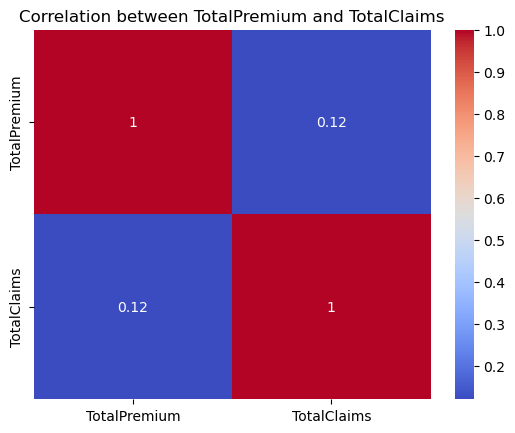

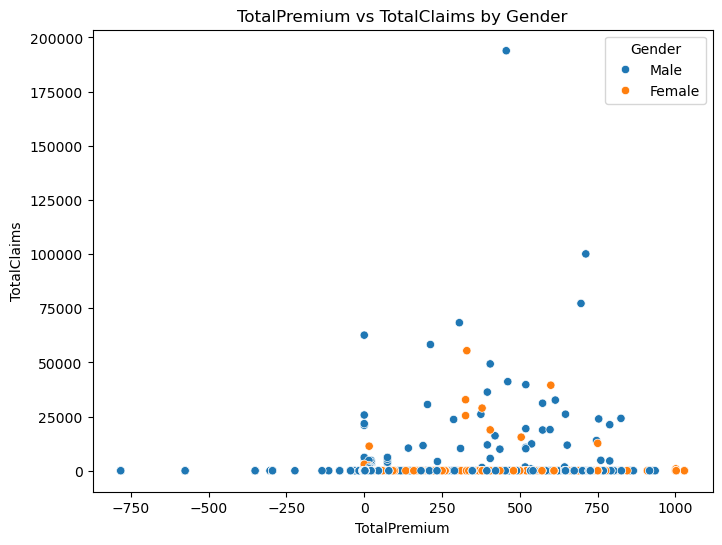

In [18]:
# Correlation between numerical features
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between TotalPremium and TotalClaims')
plt.show()

# Scatter plot for TotalPremium vs TotalClaims
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='Gender')
plt.title('TotalPremium vs TotalClaims by Gender')
plt.savefig('../output/eda_figures/total_premium_vs_total_claims.png')
plt.show()


# Geographical Trends
## We can also explore trends based on geographical data like Province or PostalCode.

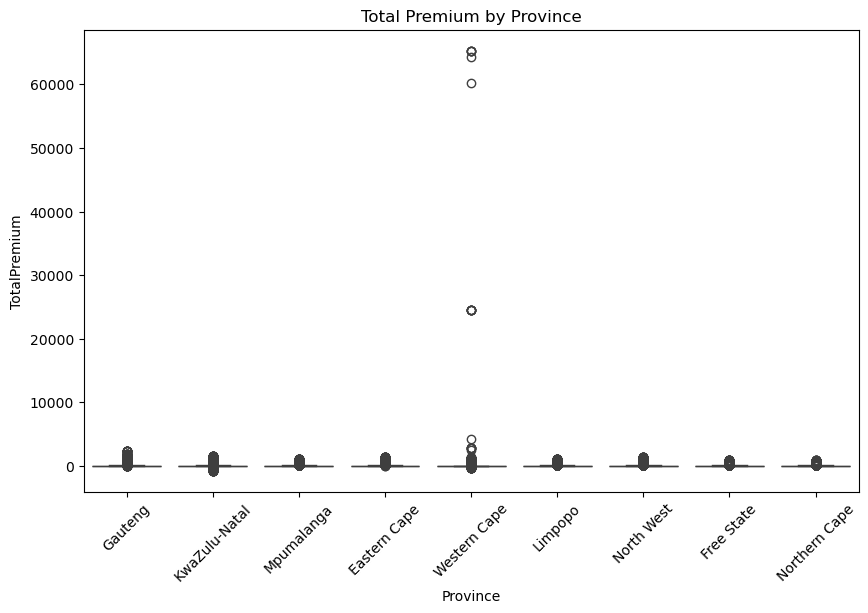

In [19]:
# Plot the distribution of TotalPremium by Province
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Province', y='TotalPremium')
plt.xticks(rotation=45)
plt.title('Total Premium by Province')
plt.savefig('../output/eda_figures/total_premium_by_province.png')
plt.show()


# Outlier Detection

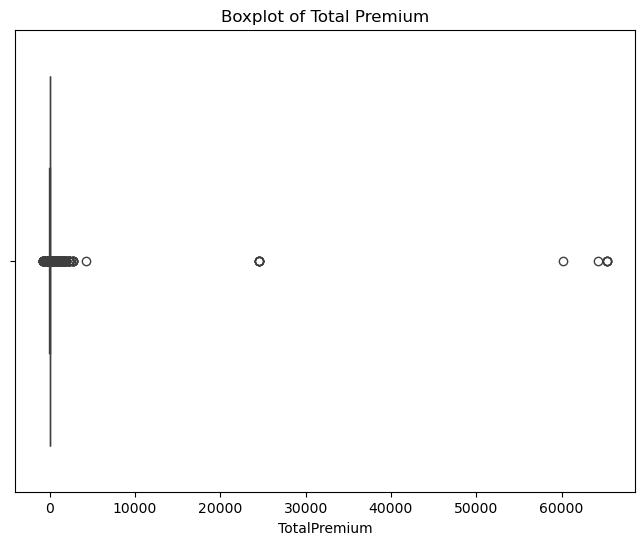

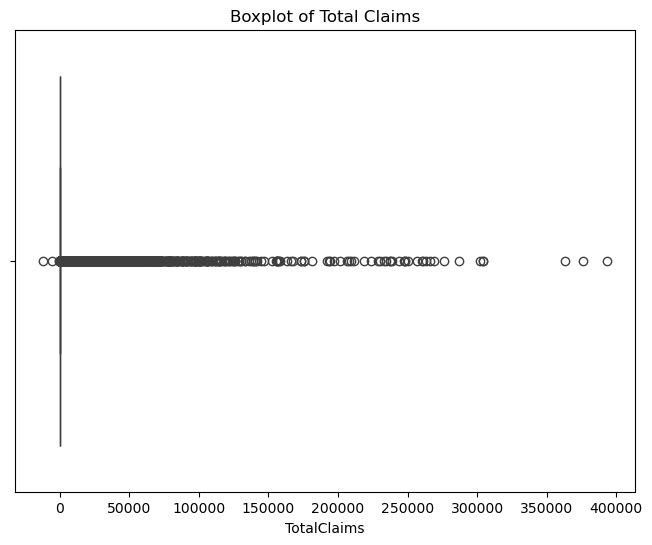

In [20]:
# Detect outliers in TotalPremium
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalPremium'])
plt.title('Boxplot of Total Premium')
plt.savefig('../output/eda_figures/total_premium_boxplot.png')
plt.show()

# Detect outliers in TotalClaims
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalClaims'])
plt.title('Boxplot of Total Claims')
plt.savefig('../output/eda_figures/total_claims_boxplot.png')
plt.show()


# Data Quality Assessment

In [22]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Remove duplicates if necessary
df = df.drop_duplicates()

# Check for invalid or inconsistent values

print(df['Gender'].value_counts())


Number of duplicate rows: 0
Gender
Male      42817
Female     6755
Name: count, dtype: int64
